- DP를 정의할 insight가 부족했던 걸지도 모른다.

### 풀이
- 원형 문제: N번이 색칠돼있을 경우를 따로 생각하고, 나머지는 선형으로 생각해도 된다.
- 순서를 고려할 필요가 없으므로(순서 정보가 사라진 것만 기록된다) 추상적으로 생각할 때, 한쪽 끝을 고정시키고 생각해도 된다.
- `DP[N][K] = (N개의 색생환 중 K개의 색을 인접하지 않게 고르는 수) % 10억+7`
  - i -> N, j -> K라고 할 때, i번째 칸을 칠하는 경우와 칠하지 않는 경우로 나눌 수 있다.
    - i번째 칸을 칠하는 경우, `이미 1개를 칠했으므로`, `j-1`개를 고르면서, 색칠한 i번째 칸에서 `인접한 2칸을 제외`시켜야 하므로 `i-2`개의 칸중에서 고르는 것과 같다.
      - 따라서 `DP[i-2][j-1]`
        - i-2가 나온 이 발상을 잘 생각해야한다.
    - i번째 칸을 칠하지 않는 경우, 임의의 패턴을 다음 그림과 같이 생각해볼 수 있다.
      - 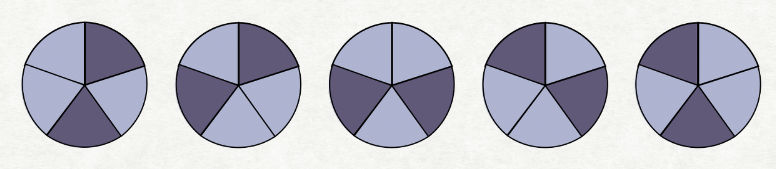
      - 에서 마지막 칸을 두개로 쪼갠다면 다음과 같다.
      - 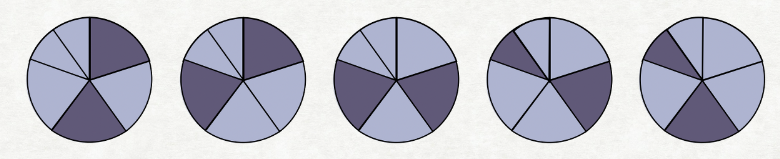
      - 이전 패턴이 반복되는 것을 확인할 수 있다. 따라서 이전 패턴의 경우의 수를 그대로 가져올 수 있다.
      - `DP[N-1][K]`
  - `DP[i][j] = DP[i-1][j] + DP[i-2][j-1]`
- `DP[N][K]`인 경우, i번째 칸을 칠했을 때 1번째 칸과도 인접해선 안되므로, `DP[N-3][K-1]`을 더해줘야 한다.

In [1]:
R = 1000000003
N, K = int(input()), int(input())
DP = [[0] * (K+1) for _ in range(N+1)] #N개의 색상환에서 K개를 선택하는 경우의 수

for i, l in enumerate(DP):
  l[1] = i
  l[0] = 1

for i in range(2, N+1):
  for j in range(2, K+1):
    DP[i][j] = (DP[i-1][j] + DP[i-2][j-1]) % R

print((DP[N-1][K] + DP[N-3][K-1]) % R)

0
